In [22]:
# sklearn has a simple linear perceptron
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris()
x = iris.data[:, (2,3)]
y = (iris.target == 0)
per_clf = Perceptron()
per_clf.fit(x,y)
y_pred = per_clf.predict([[2, 0.5]])

In [23]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
# data comes split into train and test already
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0 # / 255 to scale pixel values
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt", 
               "Sneaker", "Bag", "Ankle boot"]

print(y_valid[1:10])


[0 0 3 0 2 7 2 5 5]


In [24]:
# building the network

model = keras.models.Sequential() # sequential the simplest kind of NN
model.add(keras.layers.Flatten(input_shape=[28,28])) # Flatten layer convets 2D image into 1D array
model.add(keras.layers.Dense(300, activation="relu")) # Dense layers manage their own weight matrix for you and
model.add(keras.layers.Dense(100, activation="relu")) # Compute W.x + b, these use ReLu activation function
# Another dense layer for the output with softmax for final classfification 10 = # of classes
model.add(keras.layers.Dense(10, activation="softmax")) 

# alternatively we can pass all these into sequential as params

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
print(model.layers)
hidden1 = model.layers[1]
print(hidden1.name)
model.get_layer(hidden1.name) is hidden1

[<tensorflow.python.keras.layers.core.Flatten object at 0x13e3bf240>, <tensorflow.python.keras.layers.core.Dense object at 0x1471aca20>, <tensorflow.python.keras.layers.core.Dense object at 0x13e417668>, <tensorflow.python.keras.layers.core.Dense object at 0x1471c8048>]
dense_19


True

In [26]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.0692279  -0.06050552  0.01229084 ... -0.0580014   0.04952827
  -0.01047085]
 [ 0.02382818  0.03537996 -0.04347699 ...  0.06091744  0.01998483
   0.0648745 ]
 [-0.00396203 -0.00791813 -0.01363686 ...  0.03378983  0.05757326
  -0.02738904]
 ...
 [ 0.00571486 -0.03526743  0.05519749 ...  0.03107399  0.05601481
  -0.03156022]
 [ 0.05448185 -0.05182195 -0.00108042 ...  0.06774092  0.06570348
  -0.04225105]
 [ 0.00175667  0.02780417 -0.06093802 ...  0.00289954  0.06947821
  -0.02149503]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [27]:
# after you create your models architechture, use model.compile to specify the loss function, optimizer and metric

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [28]:
# different losses for different situations
# sparse_categorical_crossentropy for sparse vectors ie [1, 2, 3, 4, 5] as labels
# use categorical_crossentropy for 1 hot vectors [[1,0,0],[0,1,0]]
# for binary classification go back and use "sigmoid" activation and "binary_crossentropy" as loss

In [29]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.7191 - accuracy: 0.7657 - val_loss: 0.4989 - val_accuracy: 0.8382
Epoch 2/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.4885 - accuracy: 0.8301 - val_loss: 0.4410 - val_accuracy: 0.8470
Epoch 3/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.4439 - accuracy: 0.8446 - val_loss: 0.4118 - val_accuracy: 0.8590
Epoch 4/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.4166 - accuracy: 0.8532 - val_loss: 0.3927 - val_accuracy: 0.8654
Epoch 5/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.3957 - accuracy: 0.8617 - val_loss: 0.3794 - val_accuracy: 0.8728
Epoch 6/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.3791 - accuracy: 0.8662 - val_loss: 0.3787 - val_accuracy: 0.8696
Epoch 7/30
55000/55000 [==============================] -

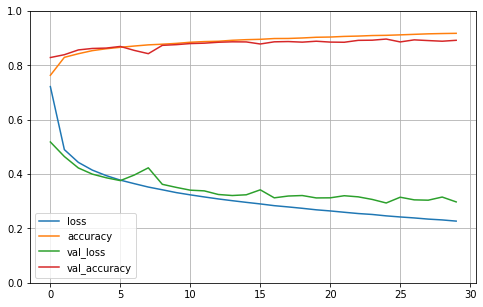

In [16]:
# Learning curves

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
# evaluate on test for final performance
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 47us/sample - loss: 57.1708 - accuracy: 0.8633


[57.170831044572594, 0.8633]

In [18]:
# now we can make predictions with the model
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
# to see the predicted classes
y_pred = model.predict_classes(x_new)
print(np.array(class_names)[y_pred])

['Ankle boot' 'Pullover' 'Trouser']


In [43]:
# regression MLP

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)
x_new = x_test[:3] # pretending these are new instances
y_pred = model.predict(x_new)


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.9598 - val_loss: 0.6512
Epoch 2/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5770 - val_loss: 0.5010
Epoch 3/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5082 - val_loss: 0.4651
Epoch 4/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4524 - val_loss: 0.4504
Epoch 5/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4404 - val_loss: 0.4329
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4292 - val_loss: 0.4255
Epoch 7/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4213 - val_loss: 0.4192
Epoch 8/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4147 - val_loss: 0.4172
Epoch 9/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4078 - val_l

In [42]:
# wide and deep NN
# Can learn complex patterns with the deep path, and simple ones with the short path
# created here with functional API

input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

(28, 28)


In [35]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 28, 30)       870         input_3[0][0]                    
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 28, 30)       930         dense_32[0][0]                   
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 28, 58)       0           input_3[0][0]                    
                                                                 dense_33[0][0]             

In [44]:
# similar but here we want option to send subsets through wide vs deep path
# needed to re run some earlier code, because changes seem to have been made to the model 

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

input_a = keras.layers.Input(shape=[5], name = "wide_input")
input_b = keras.layers.Input(shape=[6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_a, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_a, input_b], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

x_train_a, x_train_b = x_train[:, :5], x_train[:, 2:]
x_valid_a, x_valid_b = x_valid[:, :5], x_valid[:, 2:]
x_test_a, x_test_b = x_test[:, :5], x_test[:, 2:]

x_new_a, x_new_b = x_test_a[:3], x_test_b[:3]

history = model.fit((x_train_a, x_train_b), y_train, epochs=20, validation_data=((x_valid_a, x_valid_b), y_valid))
mse_test = model.evaluate((x_test_a, x_test_b), y_test)
y_pred = model.predict((x_new_a, x_new_b))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 260us/sample - loss: 2.3424 - val_loss: 1.2292
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.9287 - val_loss: 0.7626
Epoch 3/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.7174 - val_loss: 0.6769
Epoch 4/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.6555 - val_loss: 0.6364
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6219 - val_loss: 0.6073
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5970 - val_loss: 0.5863
Epoch 7/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5768 - val_loss: 0.5677
Epoch 8/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5604 - val_loss: 0.5519
Epoch 9/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.5462 - val_

In [45]:
y_pred

array([[1.856787 ],
       [2.3069134],
       [0.6789582]], dtype=float32)

In [49]:
# if we want our model to have different outputs we can do that too
# for example if we want it to perform different classification tasks
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)


input_a = keras.layers.Input(shape=[5], name = "wide_input")
input_b = keras.layers.Input(shape=[6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_a, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_a, input_b], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

x_train_a, x_train_b = x_train[:, :5], x_train[:, 2:]
x_valid_a, x_valid_b = x_valid[:, :5], x_valid[:, 2:]
x_test_a, x_test_b = x_test[:, :5], x_test[:, 2:]
x_new_a, x_new_b = x_test_a[:3], x_test_b[:3]

# two different input data, but since both are predicting the same thing we can use the same label
history = model.fit(
[x_train_a, x_train_b], [y_train, y_train], epochs=20, validation_data=([x_valid_a, x_valid_b], [y_valid, y_valid])
)

total_loss, main_loss, aux_loss = model.evaluate([x_test_a, x_test_b], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([x_new_a, x_new_b])
# we can save our models as .h5 (HDF5) files
model.save("my_keras_model.h5")

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 105us/sample - loss: 0.8745 - main_output_loss: 0.7363 - aux_output_loss: 2.1181 - val_loss: 0.5609 - val_main_output_loss: 0.5039 - val_aux_output_loss: 1.0724
Epoch 2/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5542 - main_output_loss: 0.5054 - aux_output_loss: 0.9932 - val_loss: 0.4884 - val_main_output_loss: 0.4456 - val_aux_output_loss: 0.8727
Epoch 3/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5519 - main_output_loss: 0.5194 - aux_output_loss: 0.8438 - val_loss: 0.4722 - val_main_output_loss: 0.4395 - val_aux_output_loss: 0.7651
Epoch 4/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4990 - main_output_loss: 0.4703 - aux_output_loss: 0.7556 - val_loss: 0.4442 - val_main_output_loss: 0.4157 - val_aux_output_loss: 0.6999
Epoch 5/20
11610/11610 [==============================] - 1s 48us/

In [ ]:
# if you want to customize it you can just subclass it

class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs)
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    # we can do customization in the call model, if statements, for loops anything we want in there

    def call(self, inputs):
        input_a, input_b = inputs
        hidden1 = self.hidden1(input_b)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_a, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

In [ ]:
# you can pass a callback to the fit method
# this checkpoints your model to the file,
# you can also tell it to only save the 
# hyperparameters where it performed the best
# implementing early stopping for you

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(x_train, y_train, epochs=10, callbacks=[checkpoint_cb])

# patience tells it how to long to continue after stopping with no improvement
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    validation_data=(x_valid, y_valid), 
    callbacks=[checkpoint_cb, early_stopping_cb]
)

In [ ]:
# you can also write your own custom callback to pass to the models methods
# callbacks for fit
# on_train_begin
# on_train_end
# on_epoch_begin
# on_epoch_end
# on_batch_begin
# on_batch_end
# callbacks for evaluate
# on_test_begin
# on_test_end
# on_test_batch_begin
# on_test_batch_end
# callbacks for predict
# on_predict_begin
# on_predict_end
# on_predict_batch_begin
# on_predict_batch_end

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [51]:
# tensorboard for visualization

import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 70us/sample - loss: 2.2664 - val_loss: 0.7296
Epoch 2/30
11610/11610 [==============================] - 1s 51us/sample - loss: 0.7645 - val_loss: 0.6353
Epoch 3/30
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6822 - val_loss: 0.6058
Epoch 4/30
11610/11610 [==============================] - 1s 47us/sample - loss: 0.6547 - val_loss: 0.5849
Epoch 5/30
11610/11610 [==============================] - 1s 45us/sample - loss: 0.6338 - val_loss: 0.5658
Epoch 6/30
11610/11610 [==============================] - 1s 45us/sample - loss: 0.6155 - val_loss: 0.5492
Epoch 7/30
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5994 - val_loss: 0.5361
Epoch 8/30
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5849 - val_loss: 0.5226
Epoch 9/30
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5722 - val_l

In [57]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 6358), started 0:12:45 ago. (Use '!kill 6358' to kill it.)

In [56]:
import tensorflow as tf

test_logdir= get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100)+2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random images
        tf.summary.image("my_images", images*step/1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [58]:
# build a mimic of an sklearn regressor

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

# create a regressor with this function

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(
    x_train, 
    y_train, 
    epochs=100, 
    validation_data=(x_valid, y_valid), 
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

mse_test = keras_reg.score(x_test, y_test)
y_pred = keras_reg.predict(x_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 74us/sample - loss: 1.4936 - val_loss: 0.6295
Epoch 2/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.7000 - val_loss: 0.5723
Epoch 3/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6154 - val_loss: 0.5283
Epoch 4/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5777 - val_loss: 0.5069
Epoch 5/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5536 - val_loss: 0.4893
Epoch 6/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5369 - val_loss: 0.4755
Epoch 7/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5219 - val_loss: 0.4647
Epoch 8/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5096 - val_loss: 0.4531
Epoch 9/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.500

Epoch 76/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3808 - val_loss: 0.3412
Epoch 77/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3798 - val_loss: 0.3425
Epoch 78/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3780 - val_loss: 0.3400
Epoch 79/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3779 - val_loss: 0.3406
Epoch 80/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3761 - val_loss: 0.3398
Epoch 81/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3806 - val_loss: 0.3399
Epoch 82/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3787 - val_loss: 0.3369
Epoch 83/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3720 - val_loss: 0.3388
Epoch 84/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3753 - val_loss: 0.3387
Epoch 85/100
11610/

In [59]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden" : [0,1,2,3],
    "n_neurons" : np.arange(1, 100),
    "learning_rate" : reciprocal(3e-4, 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(
    x_train, 
    y_train, 
    epochs=100, 
    validation_data=(x_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

array([2.3216228, 2.4811754, 1.094378 ], dtype=float32)

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)